Install required Dependencies:
The Folder contains a folder called venv which is virtual environment and all dependencies are installed in it, just select the same environment in the Vs code Ide.If not then before running this code install the below dependencies.
 - Pandas : pip install pandas
 - sklearn : pip install scikit-learn
 - matplotlib : pip install matplotlib
 - seaborn : pip install seaborn
 - numpy : pip install numpy


In [3]:
# Import Required Dependencies :
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
import numpy as np


In [4]:
# Load input features CSV file
#Please change the path here accordingly to your path of dataset : "C:\Users\anike\OneDrive\Desktop\Kuntal_ML_Cybersecurity_Task\Kuntal_ML_Cybersecurity_Task\Dataset\Midterm_53_group.csv"
input_features_df = pd.read_csv(r'C:\Users\anike\OneDrive\Desktop\Kuntal_ML_Cybersecurity_Task\Kuntal_ML_Cybersecurity_Task\Dataset\Midterm_53_group.csv')
input_features_df = input_features_df.drop(columns=['Protocol'])

# Load output CSV file
output_df = pd.read_csv(r'C:\Users\Kashyap Upadhyay\Downloads\Kuntal_ML_Cybersecurity_Task\Dataset\output1.csv')

# Convert timestamps in output_df to seconds
output_df['Timestamp'] = output_df['Timestamp'] / 1000000  # assuming microseconds

# Merge based on source IP, destination IP, and protocol
concatenated_df = pd.concat([input_features_df, output_df], axis=1)

concatenated_df.to_csv('concatenated_data.csv', index=False)
# Display merged DataFrame
print(concatenated_df)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Kashyap Upadhyay\\Downloads\\Kuntal_ML_Cybersecurity_Task\\Dataset\\Midterm_53_group.csv'

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394136 entries, 0 to 394135
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Source.1       393502 non-null  object 
 1   Destination.1  393502 non-null  object 
 2   Protocol       393502 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.0+ MB
None

Summary Statistics:
            Protocol
count  393502.000000
mean        6.028800
std         0.928903
min         1.000000
25%         6.000000
50%         6.000000
75%         6.000000
max        17.000000


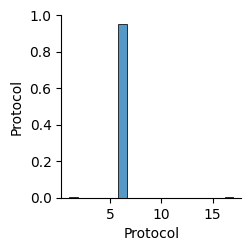

In [3]:
data_df = pd.read_csv('concatenated_data.csv')
data_df = data_df.drop(columns=['Time','No.','Length','Timestamp','Length.1','Info','Source','Destination'])
# Display basic information about the DataFrame
print("Data Info:")
print(data_df.info())

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(data_df.describe())

In [4]:
print(data_df)

             Source.1    Destination.1  Protocol
0       192.167.8.166  192.167.255.255      17.0
1       192.167.8.166  192.167.255.255      17.0
2                 NaN              NaN       NaN
3                 NaN              NaN       NaN
4                 NaN              NaN       NaN
...               ...              ...       ...
394131  192.167.7.162    192.167.7.164       1.0
394132  192.167.7.164    192.167.7.162       1.0
394133  192.167.7.162   142.250.190.97       6.0
394134  192.167.7.162    192.167.7.164       1.0
394135  192.167.7.164    192.167.7.162       1.0

[394136 rows x 3 columns]


In [5]:
data_df['Protocol'] = data_df['Protocol'].replace('NaN', np.nan)
cleaned_data_df = data_df.dropna(subset=['Protocol'])
cleaned_data_df

,Source.1,Destination.1,Protocol
0,192.167.8.166,192.167.255.255,17.0
1,192.167.8.166,192.167.255.255,17.0
25,192.167.6.248,192.167.255.255,17.0
35,192.167.8.160,192.167.255.255,17.0
38,192.167.8.160,192.167.255.255,17.0
...,...,...,...
394131,192.167.7.162,192.167.7.164,1.0
394132,192.167.7.164,192.167.7.162,1.0
394133,192.167.7.162,142.250.190.97,6.0
394134,192.167.7.162,192.167.7.164,1.0


In [7]:
# Convert 'Source IP' and 'Destination IP' to string if necessary
cleaned_data_df['Source.1'] = cleaned_data_df['Source.1'].astype(str)
cleaned_data_df['Destination.1'] = cleaned_data_df['Destination.1'].astype(str)

# Perform one-hot encoding for 'Source IP' and 'Destination IP' using label_binarize
encoded_source_ips = label_binarize(cleaned_data_df['Source.1'], classes=np.unique(cleaned_data_df['Source.1']))
encoded_dest_ips = label_binarize(cleaned_data_df['Destination.1'], classes=np.unique(cleaned_data_df['Destination.1']))

# Convert the one-hot encoded arrays into DataFrames
encoded_source_ips_df = pd.DataFrame(encoded_source_ips, columns=np.unique(cleaned_data_df['Source.1']))
encoded_dest_ips_df = pd.DataFrame(encoded_dest_ips, columns=np.unique(cleaned_data_df['Destination.1']))

# Concatenate the one-hot encoded columns with the DataFrame
encoded_data_df = pd.concat([cleaned_data_df.drop(columns=['Source.1', 'Destination.1']), encoded_source_ips_df, encoded_dest_ips_df], axis=1)

print(encoded_data_df)

C:\Users\Kashyap Upadhyay\AppData\Local\Temp\ipykernel_93176\1261746983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_df['Source.1'] = cleaned_data_df['Source.1'].astype(str)
C:\Users\Kashyap Upadhyay\AppData\Local\Temp\ipykernel_93176\1261746983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_df['Destination.1'] = cleaned_data_df['Destination.1'].astype(str)


        Protocol  0.0.0.0  10.25.3.2  10.27.3.2  104.102.248.194  \
0           17.0      0.0        0.0        0.0              0.0   
1           17.0      0.0        0.0        0.0              0.0   
25          17.0      0.0        0.0        0.0              0.0   
35          17.0      0.0        0.0        0.0              0.0   
38          17.0      0.0        0.0        0.0              0.0   
...          ...      ...        ...        ...              ...   
381424       NaN      0.0        0.0        0.0              0.0   
381425       NaN      0.0        0.0        0.0              0.0   
390864       NaN      0.0        0.0        0.0              0.0   
390999       NaN      0.0        0.0        0.0              0.0   
391000       NaN      0.0        0.0        0.0              0.0   

        104.102.248.210  104.113.27.171  104.113.29.107  104.114.79.211  \
0                   0.0             0.0             0.0             0.0   
1                   0.0          

In [8]:
encoded_data_df = encoded_data_df.dropna()
encoded_data_df

In [12]:
X = encoded_data_df.drop(columns=['Protocol'])
y = encoded_data_df['Protocol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train",X_train)
print("X_test",X_test)
print("y_train",y_train)
print("y_test",y_test)
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")

X_train         0.0.0.0  10.25.3.2  10.27.3.2  104.102.248.194  104.102.248.210  \
132477      0.0        0.0        0.0              0.0              0.0   
314548      0.0        0.0        0.0              0.0              0.0   
348309      0.0        0.0        0.0              0.0              0.0   
248241      0.0        0.0        0.0              0.0              0.0   
73419       0.0        0.0        0.0              0.0              0.0   
...         ...        ...        ...              ...              ...   
259602      0.0        0.0        0.0              0.0              0.0   
366462      0.0        0.0        0.0              0.0              0.0   
132273      0.0        0.0        0.0              0.0              0.0   
147226      0.0        0.0        0.0              0.0              0.0   
122277      0.0        0.0        0.0              0.0              0.0   

        104.113.27.171  104.113.29.107  104.114.79.211  104.114.79.75  \
132477            

c:\Users\Kashyap Upadhyay\Downloads\Kuntal_ML_Cybersecurity_Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kashyap Upadhyay\Downloads\Kuntal_ML_Cybersecurity_Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kashyap Upadhyay\Downloads\Kuntal_ML_Cybersecurity_Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

Classifier: Logistic Regression
Accuracy: 0.988151296866648
Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.10      0.17       544
         6.0       0.99      1.00      0.99     77591
        17.0       0.00      0.00      0.00       439

    accuracy                           0.99     78574
   macro avg       0.64      0.37      0.39     78574
weighted avg       0.98      0.99      0.98     78574


Classifier: Decision Tree
Accuracy: 0.9882276580039199
Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.10      0.19       544
         6.0       0.99      1.00      0.99     77591
        17.0       0.67      0.00      0.01       439

    accuracy                           0.99     78574
   macro avg       0.87      0.37      0.40     78574
weighted avg       0.99      0.99      0.98     78574


Classifier: Random Forest
Accuracy: 0.9882276580039199
Classification Repor

c:\Users\Kashyap Upadhyay\Downloads\Kuntal_ML_Cybersecurity_Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kashyap Upadhyay\Downloads\Kuntal_ML_Cybersecurity_Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kashyap Upadhyay\Downloads\Kuntal_ML_Cybersecurity_Task\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

Classifier: KNN
Accuracy: 0.988125843154224
Classification Report:
              precision    recall  f1-score   support

         1.0       0.87      0.10      0.18       544
         6.0       0.99      1.00      0.99     77591
        17.0       0.00      0.00      0.00       439

    accuracy                           0.99     78574
   macro avg       0.62      0.37      0.39     78574
weighted avg       0.98      0.99      0.98     78574


Classifier: Naive Bayes
Accuracy: 0.035749739099447654
Classification Report:
              precision    recall  f1-score   support

         1.0       0.01      0.96      0.01       544
         6.0       0.99      0.03      0.06     77591
        17.0       0.02      0.17      0.03       439

    accuracy                           0.04     78574
   macro avg       0.34      0.39      0.03     78574
weighted avg       0.98      0.04      0.05     78574


